Loading Dataset and General Preprocessing.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('credit.csv')

In [4]:
df_loan_data = df.copy()

In [5]:
print(df_loan_data.shape)
df_loan_data.head()

(1000, 20)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,1800,0.00,1800.00000,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
# checking if the dataset contains any null values
df_loan_data.isnull().sum()

checking_balance        0
months_loan_duration    0
funded_amnt             0
total_rec_prncp         0
recoveries              0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
df.dtypes

checking_balance         object
months_loan_duration      int64
funded_amnt               int64
total_rec_prncp         float64
recoveries              float64
credit_history           object
purpose                  object
amount                    int64
savings_balance          object
employment_duration      object
percent_of_income         int64
years_at_residence        int64
age                       int64
other_credit             object
housing                  object
existing_loans_count      int64
job                      object
dependents                int64
phone                    object
default                  object
dtype: object

Exploratory Data Analysis


In [8]:
# create dataset to include only numeric variables
df_numerical = df_loan_data.select_dtypes(exclude='object')


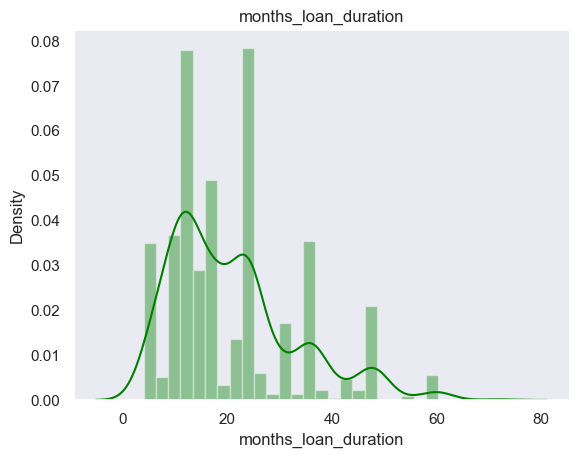

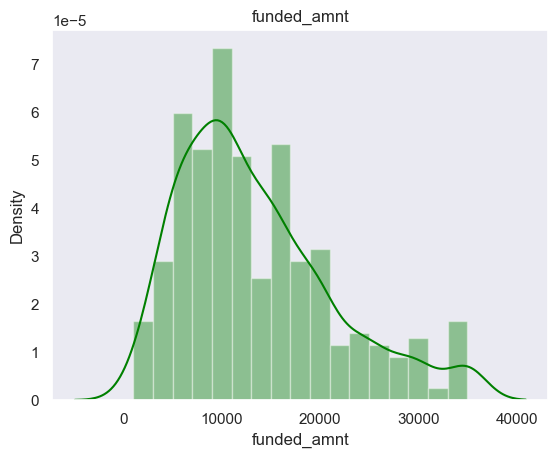

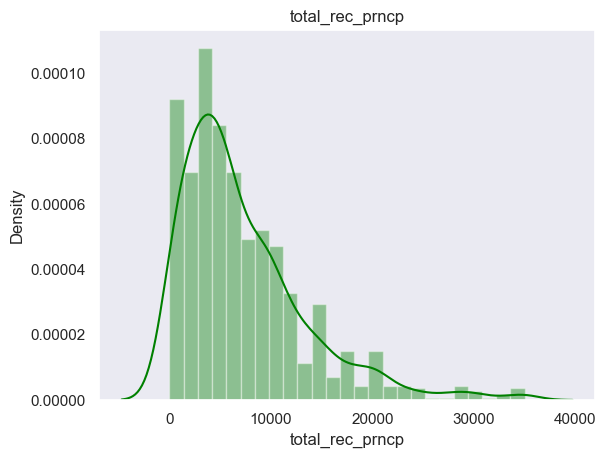

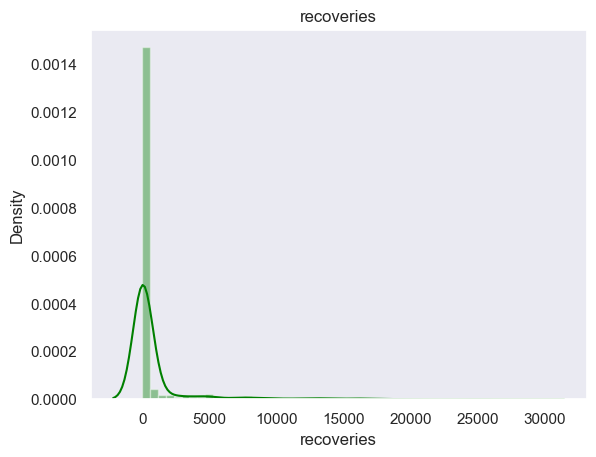

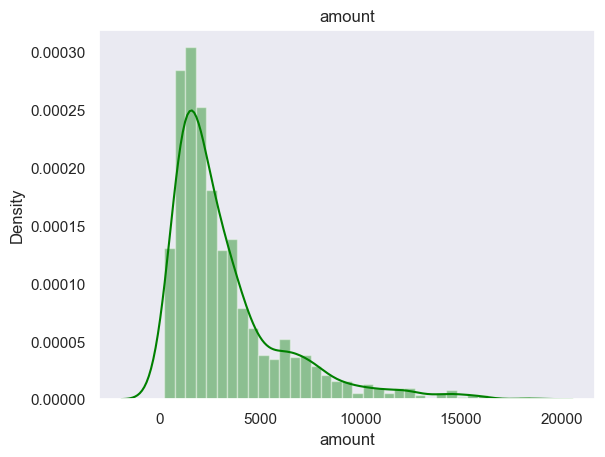

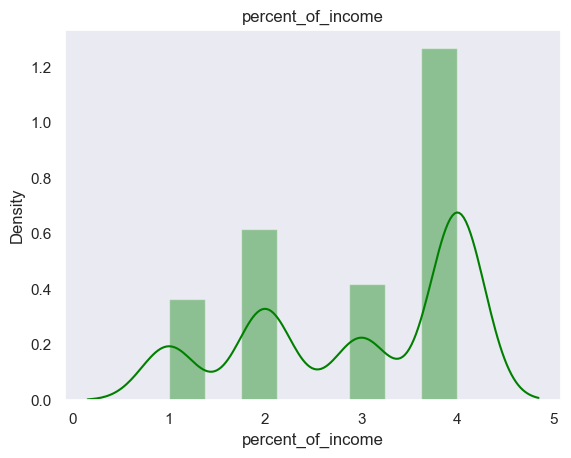

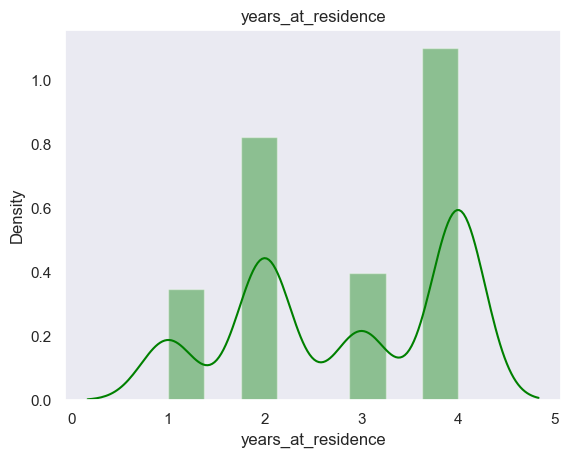

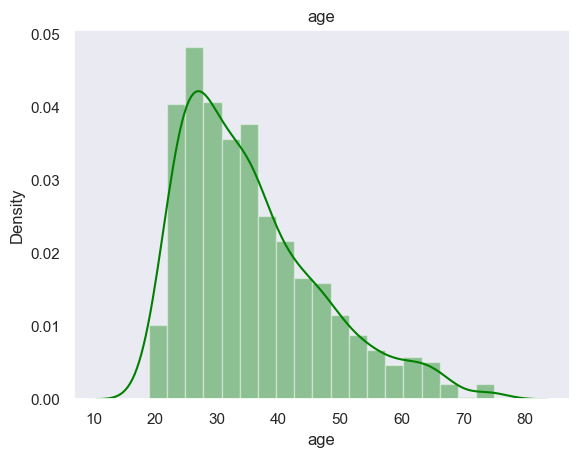

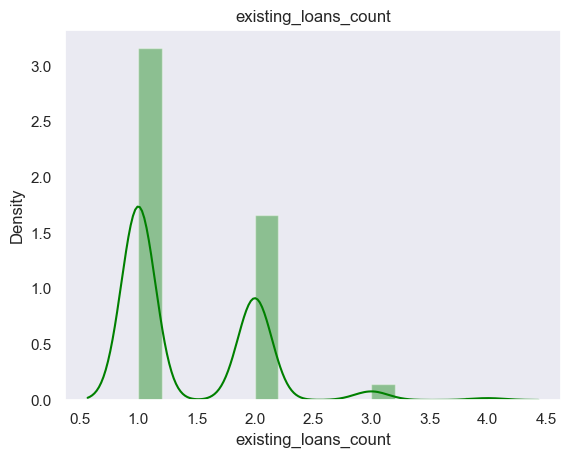

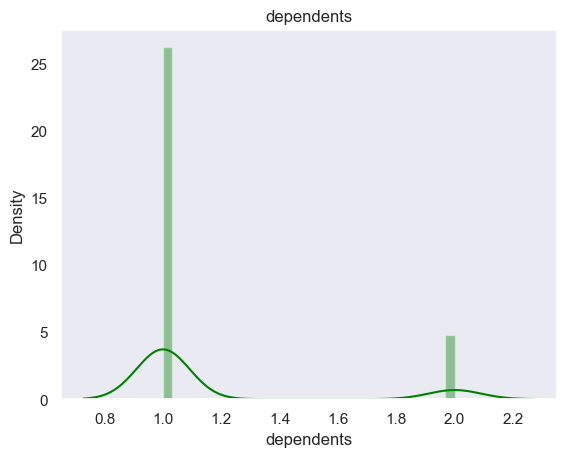

In [9]:
# create a histogram of all the numeric variables for distribution
sns.set(style='dark', palette='muted', color_codes=True)
for i in df_numerical.columns:
    sns.distplot(df_numerical[i],kde=True,color='green')
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='age', ylabel='amount'>

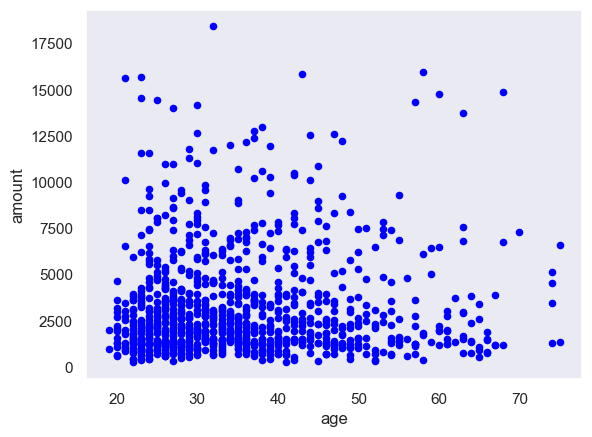

In [10]:
# creating scatter plot for all the age and amount variables
df_numerical.plot(kind='scatter',x='age',y='amount',color='blue')

<AxesSubplot:ylabel='age'>

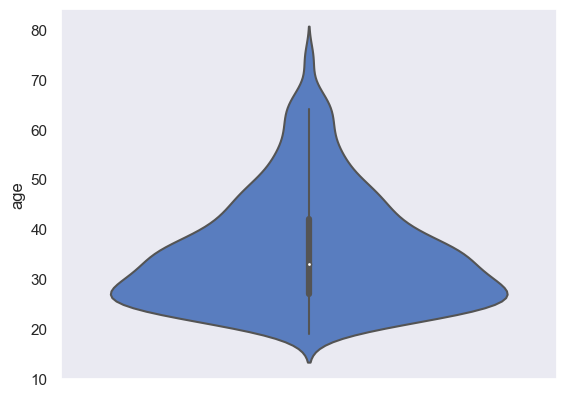

In [11]:
sns.violinplot(y='age',data=df_numerical)


In [12]:
# in purpose column, 'car' and 'car0' is same, we change car0 to car
df_loan_data['purpose'] = df_loan_data['purpose'].str.replace('car0', 'car')


In [13]:
# Converting all categorical variables into dummy variable
loan_data_dummies = [pd.get_dummies(df_loan_data['checking_balance'], prefix='checking_balance'),
                    pd.get_dummies(df_loan_data['credit_history'], prefix='credit_history'),
                    pd.get_dummies(df_loan_data['purpose'], prefix='purpose'),
                    pd.get_dummies(df_loan_data['savings_balance'], prefix='savings_balance'),
                    pd.get_dummies(df_loan_data['employment_duration'], prefix='employment_duration'),
                    pd.get_dummies(df_loan_data['other_credit'], prefix='other_credit'),
                    pd.get_dummies(df_loan_data['housing'], prefix='housing'),
                    pd.get_dummies(df_loan_data['job'], prefix='job'),
                    pd.get_dummies(df_loan_data['phone'], prefix='phone')]

In [14]:
# Convert the dummies to dataframe
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [15]:
print(loan_data_dummies.shape)
loan_data_dummies.head()

(1000, 36)


,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [16]:
# Concat with original loan dataframe
df_loan_data = pd.concat([df_loan_data, loan_data_dummies], axis=1)
print(df_loan_data.shape)

(1000, 56)


In [17]:
df_loan_data.columns.values

array(['checking_balance', 'months_loan_duration', 'funded_amnt',
       'total_rec_prncp', 'recoveries', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration',
       'percent_of_income', 'years_at_residence', 'age', 'other_credit',
       'housing', 'existing_loans_count', 'job', 'dependents', 'phone',
       'default', 'checking_balance_1 - 200 DM',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_critical',
       'credit_history_good', 'credit_history_perfect',
       'credit_history_poor', 'credit_history_very good',
       'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100 - 500 DM', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_1 - 4 years',
       'employment_duration_4 - 7 years', '

In [18]:
print(df_loan_data.shape)
df_loan_data.head()

(1000, 56)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,< 0 DM,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1 - 200 DM,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,< 0 DM,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,< 0 DM,24,1800,0.00,1800.00000,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [20]:
# categorizing default column into yes and no categories
default_cat =  ['yes', 'no']
ord_enc = OrdinalEncoder(categories=[default_cat])
df_loan_data[['default_encoded']]= ord_enc.fit_transform(df_loan_data[['default']])
df_loan_data[['default_encoded']]= df_loan_data[['default_encoded']].astype(int)
print(df_loan_data.shape)
df_loan_data.head()

(1000, 57)


,checking_balance,months_loan_duration,funded_amnt,total_rec_prncp,recoveries,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,default_encoded
0,< 0 DM,6,20000,269.45,20502.14000,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
1,1 - 200 DM,48,13200,554.76,13425.98797,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,unknown,12,16800,434.03,17076.02000,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1
3,< 0 DM,42,1500,65.48,1516.38000,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
4,< 0 DM,24,1800,0.00,1800.00000,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0


# Calculating Weight of evidence for discrete variables



In [21]:
# Function that calculates weight of evidence

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(), 
                     df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [22]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WOE']
    plt.figure(figsize=(18,6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

# Variable : checking_balance


In [23]:
df_loan_data['checking_balance'].unique()

array(['< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'], dtype=object)

In [24]:
# Weight of evidence and information value for checking_balance
df_temp = woe_discrete(df_loan_data, 'checking_balance', df_loan_data['default_encoded'])
df_temp

,checking_balance,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WoE,IV
0,< 0 DM,274,0.507299,0.274,139.0,135.0,0.198571,0.450000,-0.818099,NaN,NaN,0.666012
1,1 - 200 DM,269,0.609665,0.269,164.0,105.0,0.234286,0.350000,-0.401392,0.102366,0.416707,0.666012
2,> 200 DM,63,0.777778,0.063,49.0,14.0,0.070000,0.046667,0.405465,0.168112,0.806857,0.666012
3,unknown,394,0.883249,0.394,348.0,46.0,0.497143,0.153333,1.176263,0.105471,0.770798,0.666012


In [25]:
# Based on the Information Value, 'checking_balance' has 'Very strong' predictive power

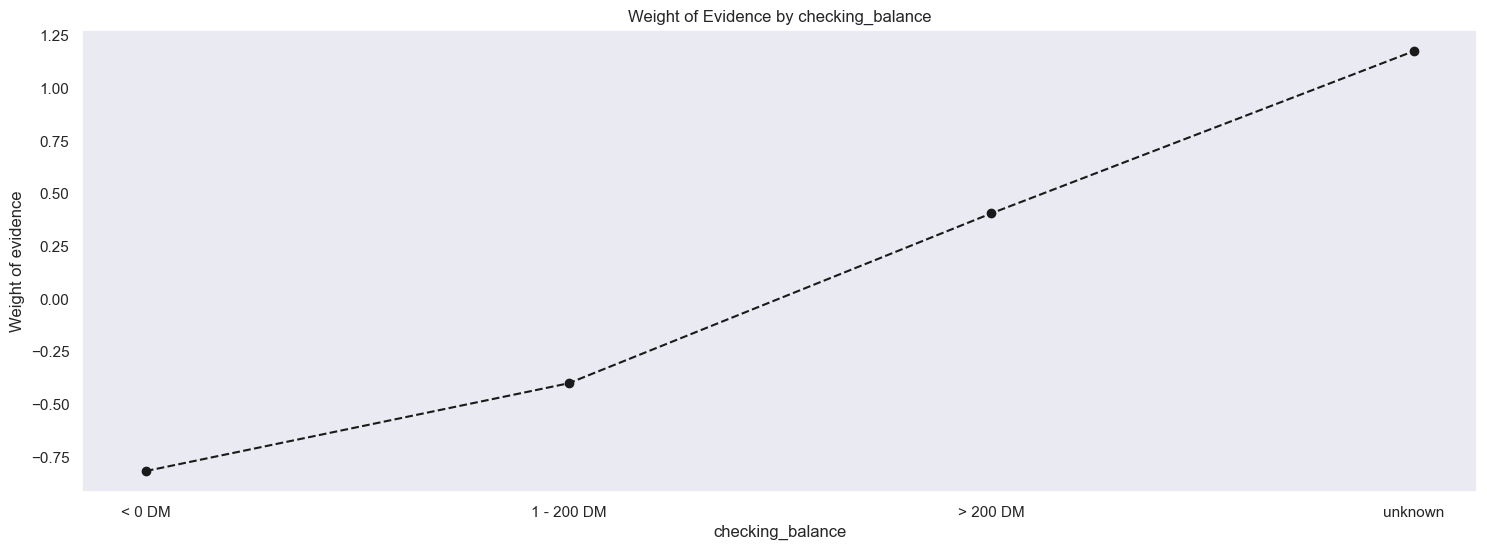

In [26]:
plot_by_woe(df_temp)